- word2vec을 사용하면 두 모델의 유사도를 측정 가능 
- 아빠라는 백터와 엄마라는 백터는 같은 거리를 가짐

## **텍스트 유사도**

- 텍스트가 얼마나 유사한지를 표현 
- 단어 개수로 유사도 판단 
- 형태소로 나누어 형태소를 비교 


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
sent = ('휴일 인 오늘 도 서쪽 을 중심 으로 폭염이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.', '폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다')
tfvec = TfidfVectorizer()
tfidf_matrix = tfvec.fit_transform(sent)
idf = tfvec.idf_
idf

array([1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.40546511,
       1.40546511, 1.40546511, 1.40546511, 1.40546511, 1.40546511,
       1.40546511, 1.        , 1.40546511, 1.40546511, 1.40546511,
       1.40546511, 1.40546511, 1.        ])

## **자카드 유사도**
- Abs(A B 교집합)/ Abs(A B 합집합)
- 24개의 단어에서 6개의 교집합이 존재하기에 자카드 유사도 결과 값이 0.25가 나옴 

## **코사인 유사도**
- Cos(delta) = np.dot(a, b) / sqrt(sum(a^2))* sqrt(sum(b^2))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[0.11304078]])

## **유클리디언 유사도**
- d(x,y) = sqrt((x_1 - y_1)^2 + .... + (x_n - y_n)^2)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_distances(tfidf_matrix[0:1], tfidf_matrix[1:2])

array([[1.33188529]])

- 값이 1보다 큰 값이 나왔으므로 정규화 진행

In [ ]:
import numpy as np
def l1_normalize(v):
    norm = np.sum(v)
    return v / norm 

tfidf_norm = l1_normalize(tfidf_matrix)
euclidean_distances(tfidf_norm[0], tfidf_norm[1])

array([[0.21243357]])

## **맨하튼 유사도**
- sum(abs(a_i - b_i))

In [ ]:
from sklearn.metrics.pairwise import manhattan_distances
manhattan_distances(tfidf_norm[0], tfidf_norm[1])

array([[0.85654185]])

- 의도한 방향과 맞는 유사도 측정 방법을 고름  

## **바비 데이터** 
- 20가지 부류의 질문 내용으로 구성 
- 그 중 하나인 Task 1은 single supporting fact 질문에 대한 답을 찾는데 한 개의 근거만 찾음 
- Where is Mary를 물어보았을 때 기계는 시간상 첫번째 Mary 위치와 마지막 Mary 위치를 확인해 Mary가 어디에 있는지 예측


## **SQuAD**
- 46개 주제에 대해 10만 개의 질문 데이터가 존재 
- 정답 위치와 완벽하게 일치하는지 Exact Matching을 통해 점수와 정답 위치가 겹치는지 F1 점수를 통해 결정 

## **Visual Question Answering**
- Image embedding(VGGNet)과 Question Embedding(LSTM)을 통해 이미지를 예측 
- 이미지 정보에 대한 정답을 예측

In [ ]:
import os 
import re 

import pandas as pd 
import tensorflow as tf 
from tensorflow.keras import utils

data_set = tf.keras.utils.get_file(
    fname = 'imdb.tar.gz',
    origin = 'http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz',
    extract = True
)

84140032/84125825 [==============================] - 5s 0us/step


In [ ]:
def directory_data(directory):
    data = {}
    data['review']= []
    for file_path in os.listdir(directory):
        with open(os.path.join(directory, file_path), 'r') as file:
            data['review'].append(file.read())

    return pd.DataFrame.from_dict(data)

def data(directory):
  pos_df = directory_data(os.path.join(directory, "pos"))
  neg_df = directory_data(os.path.join(directory, "neg"))
  pos_df["sentiment"] = 1
  neg_df["sentiment"] = 0

  return pd.concat([pos_df, neg_df])

train_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "train"))
test_df = data(os.path.join(os.path.dirname(data_set), "aclImdb", "test"))

train_df.head()

,review,sentiment
0,Sometimes I just want to laugh. Don't you? No ...,1
1,This is the most compelling and excellent perf...,1
2,Sergio Martino's The Case of the Scorpion's Ta...,1
3,"If this movie proves only one thing, it's that...",1
4,"I haven't liked many TV shows post 1990, but T...",1


In [ ]:
reviews = list(train_df['review'])
reviews

["Sometimes I just want to laugh. Don't you? No analyzing, no critiquing and no looking for deeper meaning. Rent this movie, watch it all and laugh your ass off. Don't want to admit you liked it? Fine. But don't trash it here when you and I both know you liked it. It's Damn funny!",
 'This is the most compelling and excellent performance that Robert Taylor ever gave. It even surpasses his wonderful performance as "Johnny Eager" coming a full 14 years after that film. His looks are still a wonder to see, but he has a maturity now that gives him the edge in this gritty, violent role. Charlie Gilson (Taylor) is the last of his breed, a buffalo hunter who kills not for the money but for the pleasure. His wild eyed killing of not only buffalo but human beings, is stunning to watch. He is basically a lonely man, needing the people around him, but they dislike him because of his sociopath behavior. His partner is Sandy McKenzie (Stewart Granger) who is sick of the hunt, and only goes along, b

In [ ]:
tokenized_reviews = [r.split() for r in reviews]
tokenized_reviews[0]

['Sometimes',
 'I',
 'just',
 'want',
 'to',
 'laugh.',
 "Don't",
 'you?',
 'No',
 'analyzing,',
 'no',
 'critiquing',
 'and',
 'no',
 'looking',
 'for',
 'deeper',
 'meaning.',
 'Rent',
 'this',
 'movie,',
 'watch',
 'it',
 'all',
 'and',
 'laugh',
 'your',
 'ass',
 'off.',
 "Don't",
 'want',
 'to',
 'admit',
 'you',
 'liked',
 'it?',
 'Fine.',
 'But',
 "don't",
 'trash',
 'it',
 'here',
 'when',
 'you',
 'and',
 'I',
 'both',
 'know',
 'you',
 'liked',
 'it.',
 "It's",
 'Damn',
 'funny!']

In [ ]:
review_len_by_token = [len(t) for t in tokenized_reviews]
review_len_by_token[200]

200

In [ ]:
review_len_by_eumjeol = [len(s.replace(' ', '')) for s in reviews]
review_len_by_eumjeol[0]

226

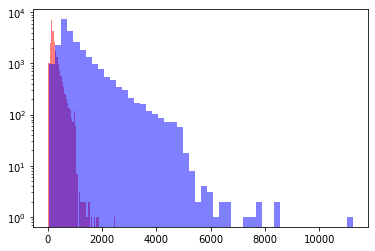

In [ ]:
import matplotlib.pyplot as plt

plt.hist(review_len_by_token, bins=50, alpha=0.5, color= 'r', label='word')
plt.hist(review_len_by_eumjeol, bins=50, alpha=0.5, color='b', label='alphabet')
plt.yscale('log', nonposy='clip')

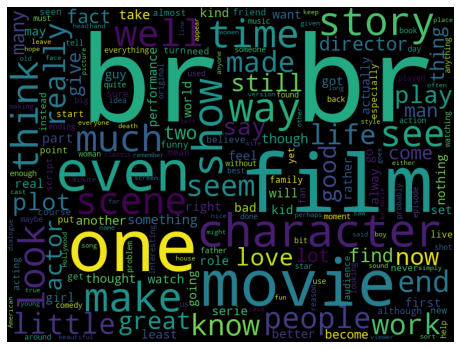

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'black', width = 800, height = 600).generate(' '.join(train_df['review']))

plt.figure(figsize = (8, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


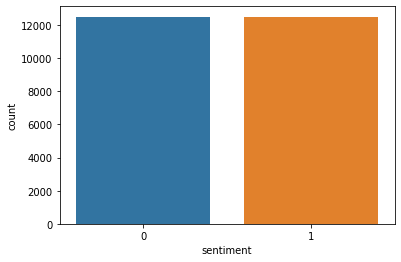

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(train_df['sentiment'])

In [ ]:
|